# 히스토그램

- 자료가 가질 수 있는 범위를 몇개의 **구간**으로 나누고 각 구간에 해당하는 값의 숫자 혹은 상대적 빈도를 표현하는 그래프


## 히스토그램 작성 과정
1. 자료의 갯수와 구간(최대값, 최소값)을 확인한다.
1. 자료를 몇 개의 구간으로 나눌지 분석가의 주관에 따라 결정한다.
    - 구간은 자료의 개수나 분포에 따라 달라져야 한다
    - 각 구간별로 5개 이상의 값이 들어가도록 하는 것이 좋다.
    - 너무 많은 구간을 나누지 않도록 해야 한다.(일반적으로 5~15 사이의 값)
1. Pyplot의 hist() 함수를 사용하여 히스토그램을 생성한다
    '''python
    n, bins, patches = pyplot.hist(값, 구간의_수)
    '''
    - n은 각 구간에 포함된 값의 갯수 혹은 빈도를 표현하는 리스트
    - bins는 각 구간별 경계값 리스트
    - patches는 각 구간을 그리는 matlplot 객체 리스트

## #01. 필요한 패키지 및 샘플 데이터 준비


In [1]:
from pandas import DataFrame #모듈참조
from pandas import read_csv #모듈참조
from matplotlib import pyplot #모듈참조
#from sample import height #데이터참조

In [2]:
# 성적표 데이터 -> 기술통계 수치값, 상자그림 확인을 위한 샘플 데이터
성적표csv=read_csv("http://itpaper.co.kr/demo/python/grade.csv",encoding="euc-kr")
성적표csv

,이름,국어,영어,수학,과학
0,학생1,98.0,NaN,88.0,64.0
1,학생2,88.0,90.0,62.0,72.0
2,학생3,92.0,70.0,NaN,NaN
3,학생4,63.0,60.0,31.0,70.0
4,학생5,100.0,50.0,NaN,88.0
...,...,...,...,...,...
9995,학생9996,63.0,60.0,55.0,70.0
9996,학생9997,21.0,50.0,55.0,88.0
9997,학생9998,98.0,90.0,88.0,64.0
9998,학생9999,88.0,90.0,62.0,72.0


## #02성적표 데이터 전처리

In [5]:
학생이름={}
for i, v in enumerate(list(성적표csv['이름'])):
    학생이름[i]=v
    
성적표df=성적표csv.rename(index=학생이름).drop('이름',axis=1)
성적표df

,국어,영어,수학,과학
학생1,98.0,NaN,88.0,64.0
학생2,88.0,90.0,62.0,72.0
학생3,92.0,70.0,NaN,NaN
학생4,63.0,60.0,31.0,70.0
학생5,100.0,50.0,NaN,88.0
...,...,...,...,...
학생9996,63.0,60.0,55.0,70.0
학생9997,21.0,50.0,55.0,88.0
학생9998,98.0,90.0,88.0,64.0
학생9999,88.0,90.0,62.0,72.0


In [6]:
성적표df['평균'] =  성적표df.mean(axis=1)
성적표df

,국어,영어,수학,과학,평균
학생1,98.0,NaN,88.0,64.0,83.333333
학생2,88.0,90.0,62.0,72.0,78.000000
학생3,92.0,70.0,NaN,NaN,81.000000
학생4,63.0,60.0,31.0,70.0,56.000000
학생5,100.0,50.0,NaN,88.0,79.333333
...,...,...,...,...,...
학생9996,63.0,60.0,55.0,70.0,62.000000
학생9997,21.0,50.0,55.0,88.0,53.500000
학생9998,98.0,90.0,88.0,64.0,85.000000
학생9999,88.0,90.0,62.0,72.0,78.000000


## #03히스토그램을 생성하기

1) 자료의 갯수를 센다

In [8]:
count = len(성적표df['평균'])
print("자료의 수= ", count)

자료의 수=  10000


2) 자료 내에서 최대/최소값을 찾는다

axis= 1을 지정하지 않을 경우 컬럼단위(세로방향)으로 집계한다

In [23]:
max_value = 성적표df['평균'].max()
min_value = 성적표df['평균'].min()
print("최대값 = ", max_value)
print("최소값 = ", min_value)

최대값 =  93.5
최소값 =  15.0


3) 몇개 구간으로 나눌지 정한다

In [11]:
step = 5

4) 히스토그램 생성하기<br>
그래프에 대한 한글 폰트, 글자크기, 그래픽 크기 설정

In [17]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 20
pyplot.rcParams["figure.figsize"] = (25,10)

데이터와 구간을 사용하여 히스토그램 작성하기

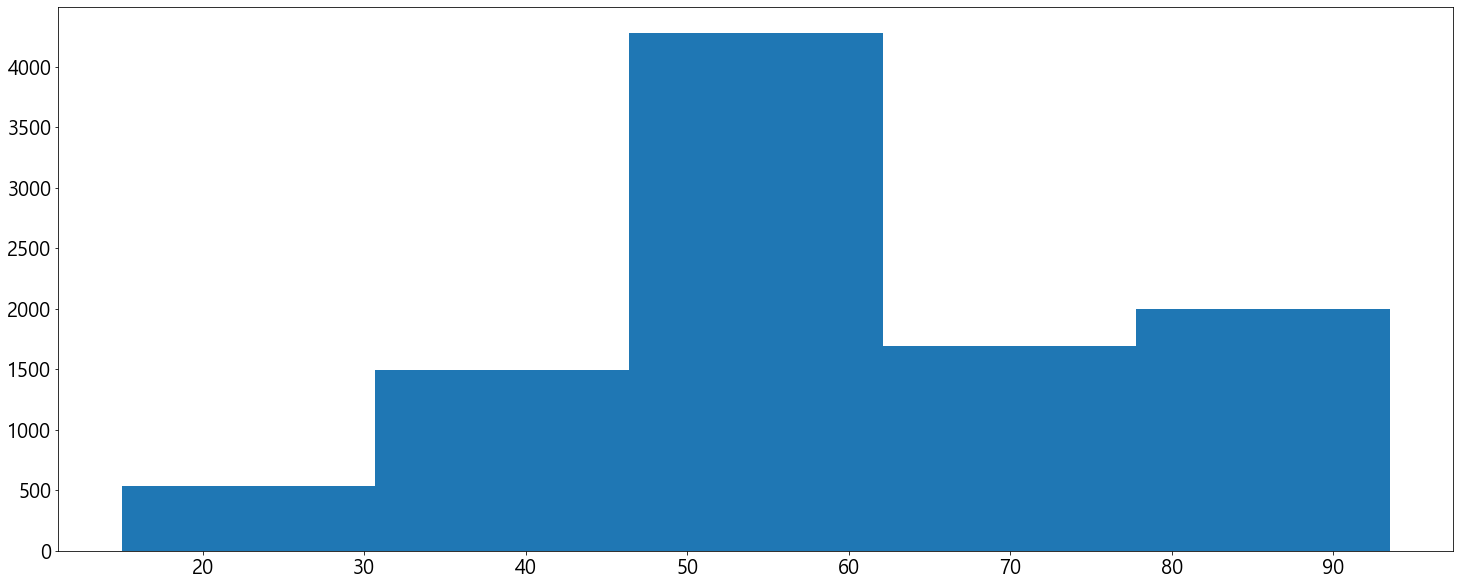

In [18]:
n, bins, patches = pyplot.hist(성적표df['평균'], bins=step)

In [21]:
n    #막대그래프의 높이(y축)

array([ 538., 1491., 4279., 1694., 1998.])

In [22]:
bins  #각각의 막대의 시작점과 끝점(x축)

array([15. , 30.7, 46.4, 62.1, 77.8, 93.5])

- 15점~30.7점 : 538명
- 30.7점~46.4점 : 1491명
- 46.4점~62.1점 : 4279명
- 62.1점~77.8점 : 1694명
- 77.8점~93.5점 : 1998명

5) 히스토그램 보정하기

In [33]:
# bins 리스트의 원소들을 소수점 둘째 자리에서 반올림
for i, v in enumerate(bins):
    bins[i] = round(v,1)
bins

array([15. , 30.7, 46.4, 62.1, 77.8, 93.5])

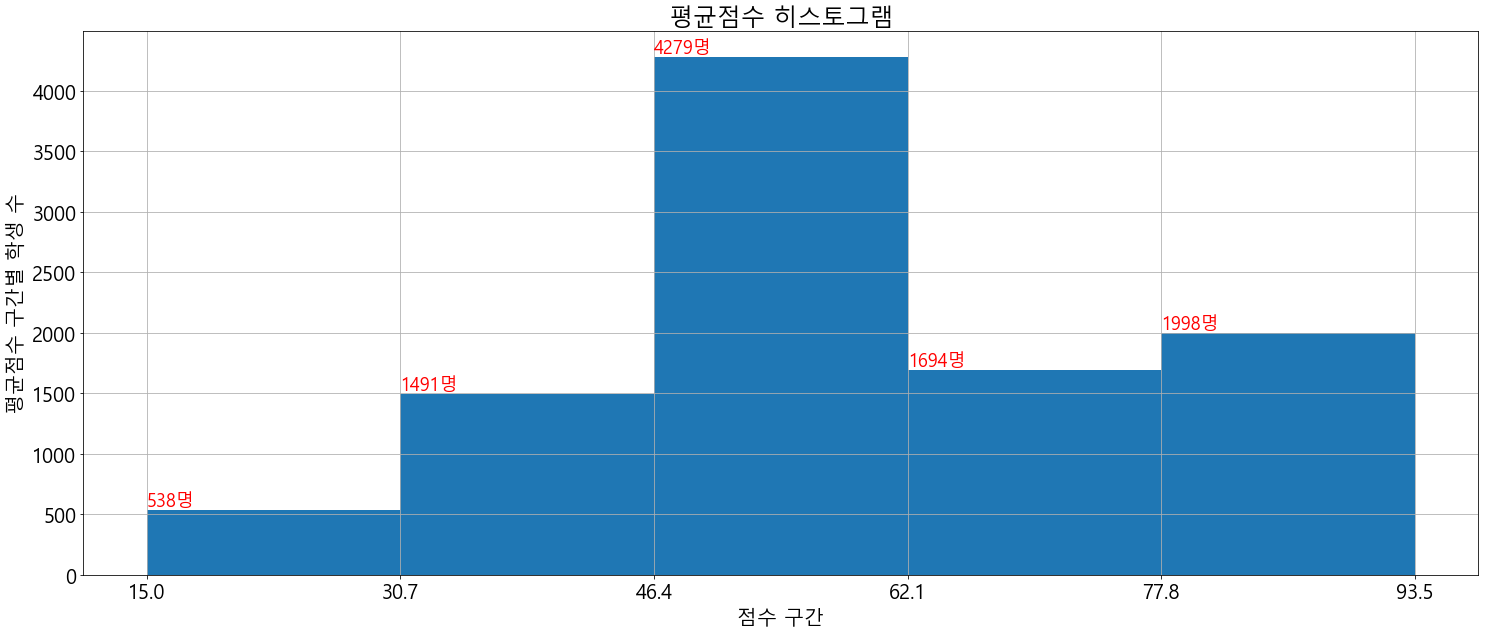

In [46]:
pyplot.hist(성적표df['평균'], bins=step)
pyplot.grid()
pyplot.xlabel('점수 구간')
pyplot.ylabel('평균점수 구간별 학생 수')
pyplot.title('평균점수 히스토그램')

# xticks(파라미터1,파라미터2)
# 첫번째 파라미터는 그래프의 x축 좌표 리스트
# 두번 재 파라미터는 각 좌표에 출력될 값에 대한 리스트
pyplot.xticks(bins,bins)

for i, v in enumerate(bins):
    if i < len(n):
        txt = "%d명" % n[i]
        pyplot.text(v, n[i], txt, fontsize=18, color ='#ff0000',
                    horizontalalignment='left', verticalalignment='bottom')

pyplot.show()
